In [3]:
# TrainBaseModel.ipynb

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os








In [4]:
#Step 1: Load Dataset from DataLoader  module
image_size = (180, 180)
batch_size = 16

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "food_6",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical",
)


Found 500 files belonging to 5 classes.
Using 400 files for training.
Using 100 files for validation.


2025-07-16 17:00:27.887934: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
#  Step 2: Setup Transfer Learning Base Model 
base_model = keras.applications.MobileNetV2(
    input_shape=image_size + (3,),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # Freeze base model


/tmp/ipykernel_427/1179456457.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(


In [6]:

#  Step 3: Add Classification Head 
inputs = keras.Input(shape=image_size + (3,))
x = keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs, outputs)


In [7]:
#  Step 4: Compile and Train 
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.3113 - loss: 1.8032 - val_accuracy: 0.6800 - val_loss: 0.8129
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - accuracy: 0.7880 - loss: 0.6585 - val_accuracy: 0.8200 - val_loss: 0.5243
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.8249 - loss: 0.4438 - val_accuracy: 0.8700 - val_loss: 0.4505
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - accuracy: 0.9253 - loss: 0.2771 - val_accuracy: 0.8600 - val_loss: 0.4164
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - accuracy: 0.9466 - loss: 0.2056 - val_accuracy: 0.8600 - val_loss: 0.3887
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.9683 - loss: 0.1622 - val_accuracy: 0.8700 - val_loss: 0.3895
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.9749 - loss: 0.1551 - val_accuracy: 0.8800 - val_loss: 0.3841
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.9806 - loss: 0.1265 - val_accuracy: 0.

In [15]:
model.save("baseline_model.keras")


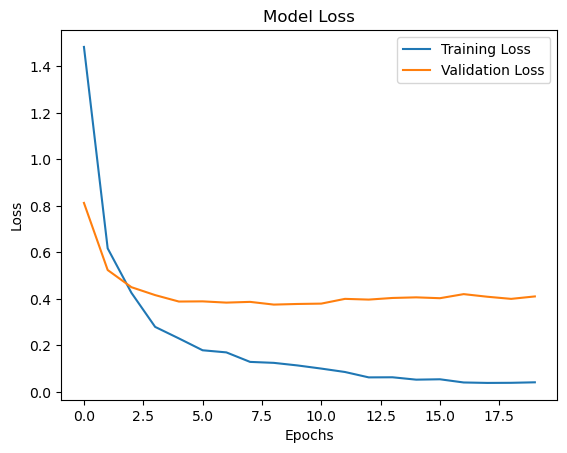

In [14]:
plt.plot(range(len(history.history["loss"])), history.history["loss"], label="Training Loss")
plt.plot(range(len(history.history["val_loss"])), history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


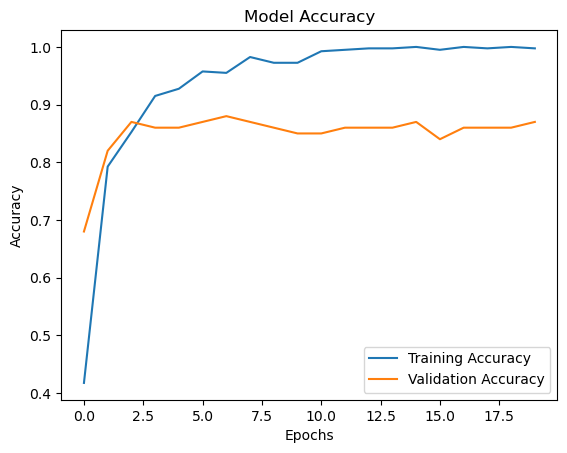

In [13]:
plt.plot(range(len(history.history["accuracy"])), history.history["accuracy"], label="Training Accuracy")
plt.plot(range(len(history.history["val_accuracy"])), history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
